# Segmentation

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import PIL

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
from helpers import imshow
# Make the colormap reproducible
np.random.seed(2563)    

## Creation of a Dataset container

In [3]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Segmentation Visualization

Set a random color map for segmentation visualization and apply it to segmentation map

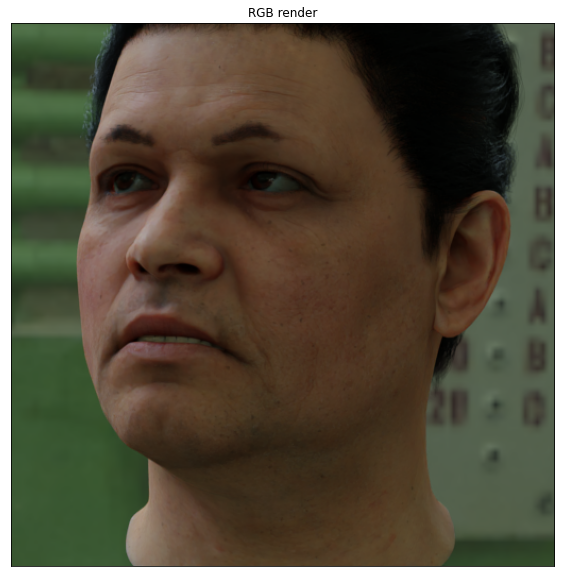

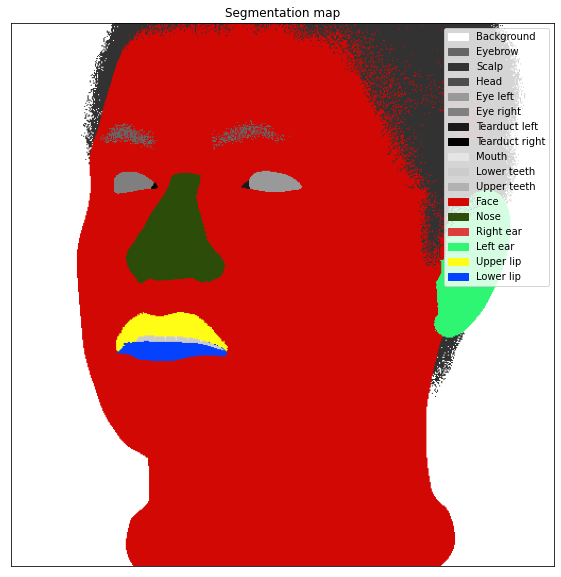

In [4]:
imshow(dp.rgb_img)
plt.title('RGB render')

handles = [Patch(label='Background', color=[1., 1., 1.]), 
Patch(label='Eyebrow', color=dp.eyebrows),
Patch(label='Scalp', color=dp.scalp),
Patch(label='Head', color=dp.head), 
Patch(label='Eye left', color=dp.eye_left), 
Patch(label='Eye right', color=dp.eye_right), 
Patch(label='Tearduct left', color=dp.tearduct_left), 
Patch(label='Tearduct right', color=dp.tearduct_right), 
Patch(label='Mouth', color=dp.Mouth_geo),  
Patch(label='Lower teeth', color=dp.Teeth_low_geo),
Patch(label='Upper teeth', color=dp.Teeth_up_geo), 
Patch(label='Face', color=dp.face), 
Patch(label='Nose', color=dp.nose),  
Patch(label='Right ear', color=dp.ear_right), 
Patch(label='Left ear', color=dp.ear_left),
Patch(label='Upper lip', color=dp.lips_up), 
Patch(label='Lower lip', color=dp.lips_bottom)]

imshow(dp.semantic_seg_map)
plt.title('Segmentation map')
plt.legend(handles=handles)

## Background replacement
We'll remove the original background from the image using the segmentation map and replace it with a new random background

Let's load the new background and crop it to the render size

In [5]:
random_background = plt.imread('imgs/random_background.jpg')
random_background = PIL.Image.fromarray(random_background).crop(box=(0, 0, dp.rgb_img.shape[0], dp.rgb_img.shape[1]))
random_background = np.asarray(random_background)

Create a background mask (all the segmentation map pixels with values = 1)

Text(0.5, 1.0, 'Background mask')

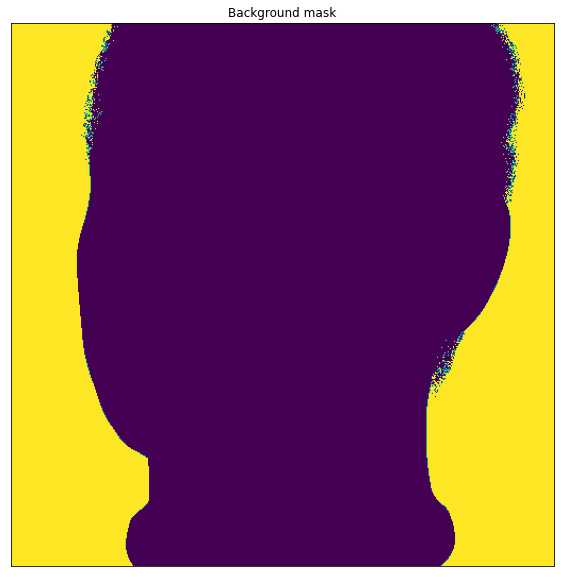

In [6]:
background_mask = np.logical_and.reduce(dp.semantic_seg_map == 1., axis=2)
imshow(background_mask.astype('float'))
plt.title('Background mask')

Now replace the background pixels from the render with the new background's pixels

Text(0.5, 1.0, 'Rgb render with the new background')

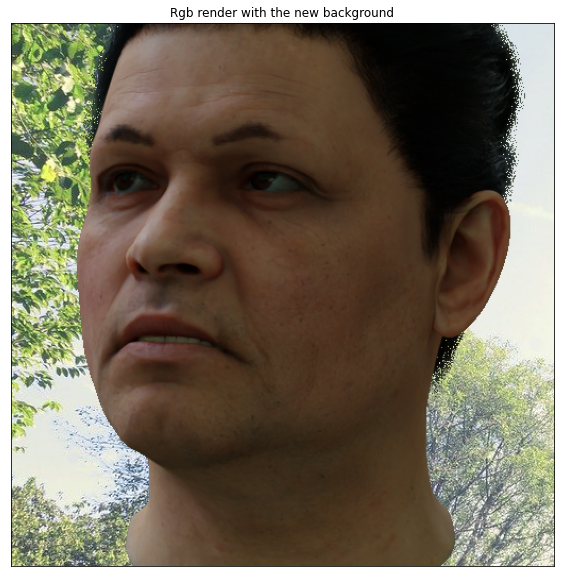

In [7]:
rgb_new_background = dp.rgb_img.copy()
rgb_new_background[background_mask] = np.asarray(random_background)[background_mask]

imshow(rgb_new_background)
plt.title('Rgb render with the new background')